<a href="https://colab.research.google.com/github/Pandey23000Om/Image-Classification/blob/main/task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f = gzip.open('train-images-idx3-ubyte.gz','r')

In [ ]:
image_size = 28
num_images = 60000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(data.shape)
data = data.reshape(num_images, image_size, image_size, 1)


(47040000,)


In [ ]:
data.shape

(60000, 28, 28, 1)

In [ ]:
for i in range(5):
    image = np.asarray(data[i]).squeeze()
    plt.imshow(image)
    plt.show()



In [ ]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
lst={}
for i in range(0,50):
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    #print(labels)
    #print(type(labels))
    lst[labels]=i
print(labels)
print(lst)

[3]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import gzip

In [ ]:

def images(s):
    with gzip.open(s, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def labels(s):
    with gzip.open(s, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [ ]:
X_train = images('train-images-idx3-ubyte.gz')
y_train = labels('train-labels-idx1-ubyte.gz')
X_test = images('t10k-images-idx3-ubyte.gz')
y_test = labels('t10k-labels-idx1-ubyte.gz')

In [ ]:
import xgboost
from sklearn.model_selection import cross_val_score

In [ ]:
model = xgboost.XGBClassifier(max_depth=4, learning_rate=0.01, n_estimators=10, gamma = 0.5, max_delta_step=0.1, min_child_weight=0.2, nthread = 4, objective = 'multisoftmax', reg_alpha=0.5, reg_lambda=0.8, scale_pos_weight=1, subsample=0.8)

cv_results = cross_val_score
print(cv_results)

<function cross_val_score at 0x7fa0042fbea0>


In [ ]:
len(y_train)

60000

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=(60000,28,28)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
#X_train = X_train.reshape(60000, 28, 28)
#X_test = X_test.reshape(10000, 28, 28)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: ignored

In [ ]:
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784')

In [ ]:
x, y = mnist['data'], mnist['target']

In [ ]:
x.shape

(70000, 784)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

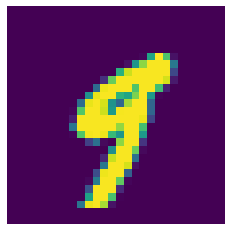

In [ ]:
plt.imshow(some_digit_image, interpolation='nearest')
plt.axis("off")

In [ ]:
y[36000]

'9'

In [ ]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]

In [ ]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

In [ ]:
y_train[36000]

'3'

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(tol = 0.1)

In [ ]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tol=0.1, verbosity=1)

In [ ]:
clf.predict(x_train)

array(['1', '5', '4', ..., '2', '3', '9'], dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score as cvs

In [ ]:
cvs(clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.93105, 0.9351 , 0.93175])

In [ ]:
cvs(clf, x_test, y_test, cv=3, scoring='accuracy')

array([0.89622076, 0.91329133, 0.93189319])

In [ ]:
y_pred = clf.predict(x_test)



from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("R2_Score for test: ", r2_score(y_test, y_pred))

RMSE:  1.054229576515476
R2_Score for test:  0.8674568916837445


In [ ]:
clf.predict(x_test[9999:])

array(['6'], dtype=object)

In [ ]:
y_test[-1]

'6'